### Test particle densities, focus, field of camera etc.

First try 01

In [2]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import img_as_int

In [18]:
frame_a1  = openpiv.tools.imread( '../25may19/img01_0004.jpg' )
frame_b1  = openpiv.tools.imread( '../25may19/img01_0014.jpg' )
frame_a2  = openpiv.tools.imread( '../25may19/img02_0004.jpg' )
frame_b2  = openpiv.tools.imread( '../25may19/img02_0014.jpg' )


In [19]:
print(frame_a1.shape)
print(frame_a2.dtype) # result is (1080, 1920) and float64

(1080, 1920)
float64


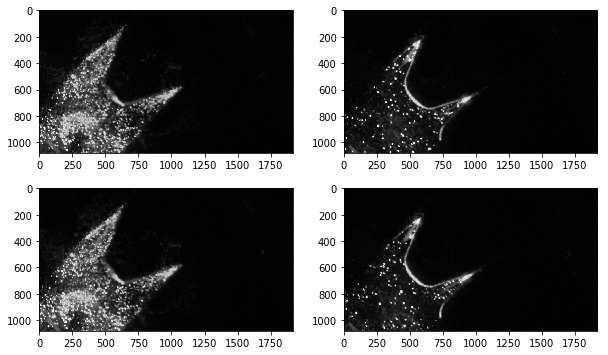

In [20]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(frame_a1, cmap='gray')
ax[0,1].imshow(frame_a2, cmap='gray')
ax[1,0].imshow(frame_b1, cmap='gray')
ax[1,1].imshow(frame_b2, cmap='gray')

In [21]:
frame_a1_int = img_as_int(1-frame_a1)
frame_b1_int = img_as_int(1-frame_b1)
frame_a2_int = img_as_int(1-frame_a2)
frame_b2_int = img_as_int(1-frame_b2)

/home/kramosmu/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to int16
  "%s to %s" % (dtypeobj_in, dtypeobj))


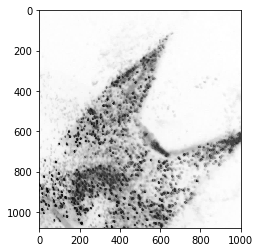

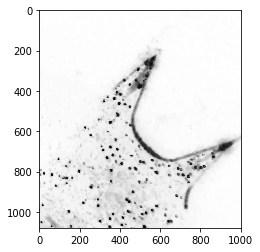

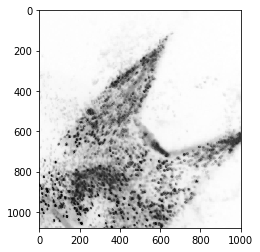

In [22]:
plt.imshow(frame_a1_int[:,:1000].astype(np.int32),cmap='gray')
plt.show()
plt.imshow(frame_a2_int[:,:1000].astype(np.int32),cmap='gray')
plt.show()

fra1 = frame_a1_int[:,:1000].astype(np.int32)
frb1 = frame_b1_int[:,:1000].astype(np.int32)
fra2 = frame_a2_int[:,:1000].astype(np.int32)
frb2 = frame_b2_int[:,:1000].astype(np.int32)

plt.imshow(frb1+fra1,cmap='gray')
plt.show()



Notes:

    window_size > overlap

In [41]:
window_size = 48
overlap = 32
dt = 10/30
search_area_size = 16

u, v, sig2noise = openpiv.process.extended_search_area_piv(fra1, frb1,
                                                           window_size, 
                                                           overlap=overlap, 
                                                           dt=dt, 
                                                           search_area_size=search_area_size, 
                                                           sig2noise_method='peak2peak')
print(np.shape(u), np.shape(v), np.shape(sig2noise))


/home/kramosmu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


(65, 60) (65, 60) (65, 60)


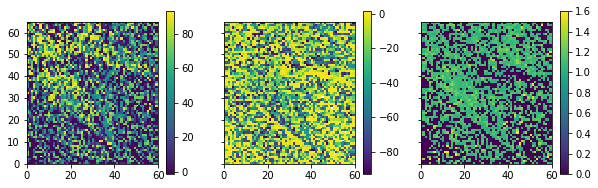

In [42]:
fig, ax = plt.subplots(1,3,figsize=(10,3.0), sharey=True)

pc_u = ax[0].pcolor(u)
plt.colorbar(pc_u, ax=ax[0])
ax[0].set_aspect(1)

pc_v = ax[1].pcolor(v)
plt.colorbar(pc_v, ax=ax[1])
ax[1].set_aspect(1)

pc_s2n = ax[2].pcolor(sig2noise)
plt.colorbar(pc_s2n, ax=ax[2])
ax[2].set_aspect(1)


In [43]:
x, y = openpiv.process.get_coordinates( image_size=fra2.shape, window_size=window_size, overlap=overlap )

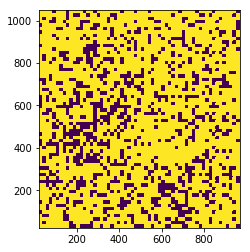

In [45]:
umask, vmask, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.1 )
plt.pcolor(x,y,mask)
ax = plt.gca()
ax.set_aspect(1)

/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:64: RuntimeWarning: invalid value encountered in less
  np.logical_or(u < u_thresholds[0], u > u_thresholds[1]), \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:64: RuntimeWarning: invalid value encountered in greater
  np.logical_or(u < u_thresholds[0], u > u_thresholds[1]), \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:65: RuntimeWarning: invalid value encountered in less
  np.logical_or(v < v_thresholds[0], v > v_thresholds[1]) \
/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/validation.py:65: RuntimeWarning: invalid value encountered in greater
  np.logical_or(v < v_thresholds[0], v > v_thresholds[1]) \


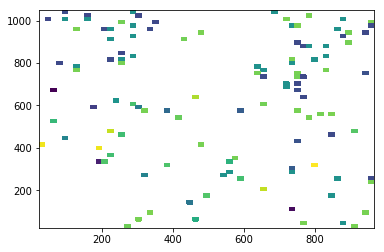

In [46]:
uval, vval, mask = openpiv.validation.global_val( umask, vmask, (-5000, 5000), (-5000, 5000) )
plt.pcolor(x,y,uval)

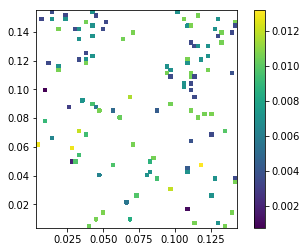

In [47]:
# scaling factor is in pix/m
sca_factor = 1/0.000148
xsca, ysca, usca, vsca = openpiv.scaling.uniform(x, y, uval, vval, scaling_factor = sca_factor )
pc = plt.pcolor(xsca,ysca,usca)
ax = plt.gca()
plt.colorbar(pc, ax=ax)
ax.set_aspect(1)

In [48]:
openpiv.tools.save(xsca, ysca, usca, vsca, mask, 'img02.txt' )

/home/kramosmu/anaconda3/lib/python3.5/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


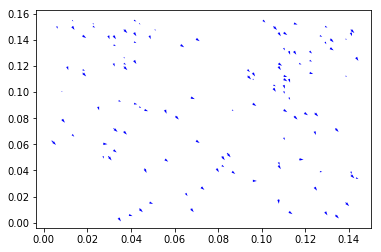

In [49]:
openpiv.tools.display_vector_field('img02.txt', scale=1, width=0.0025)


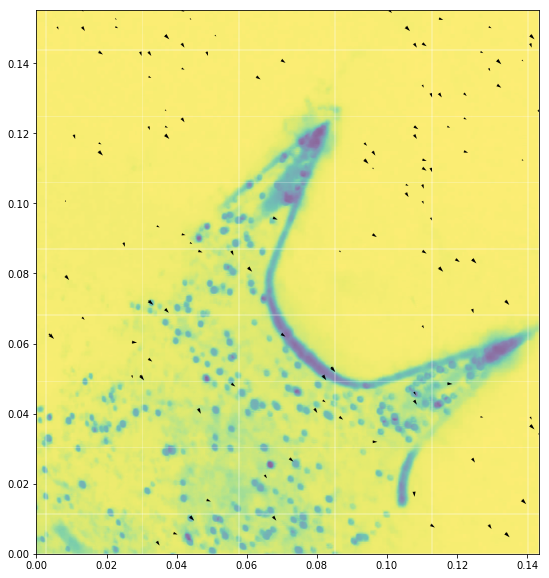

In [50]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.pcolormesh(np.linspace(0,np.max(xsca),1000),np.linspace(0,np.max(ysca),1080),np.flipud(fra2+frb2), alpha=0.1)
ax.quiver(xsca,ysca,usca,vsca, color='k')
ax.set_aspect(1)